In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:

def load_data(filepath):
    try:
        return pd.read_csv(filepath)
    except FileNotFoundError:
        print("The file was not found. Please check the filepath.")
        return None

# Create sequences for LSTM input
def create_sequences(data, sequence_length, target_column_index):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), :]) 
        y.append(data[i + sequence_length, target_column_index])  
    return np.array(X), np.array(y)

# Prepare data for LSTM
def prepare_data(filepath, sequence_length, target_column):
    data = load_data(filepath)
    if data is not None:
        if target_column in data.columns:
            scaler = StandardScaler()
            data_scaled = scaler.fit_transform(data.values)
            target_column_index = data.columns.get_loc(target_column)
            X, y = create_sequences(data_scaled, sequence_length, target_column_index)
            split = int(0.8 * len(X))
            X_train, X_test = X[:split], X[split:]
            y_train, y_test = y[:split], y[split:]
            return X_train, y_train, X_test, y_test, scaler
        else:
            print(f"Column '{target_column}' not found in the data.")
            return None, None, None, None, None
    else:
        return None, None, None, None, None

filepath = 'data_preprocessed_with_all_sectors.csv'
sequence_length = 10
target_column = 'Price'

# Prepare the data
X_train, y_train, X_test, y_test, scaler = prepare_data(filepath, sequence_length, target_column)

# Print dataset shapes
if X_train is not None:
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")


X_train shape: (388, 10, 21)
y_train shape: (388,)
X_test shape: (97, 10, 21)
y_test shape: (97,)


Epoch 1/100


2025-01-19 16:28:56.995540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-19 16:28:56.996617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-19 16:28:56.997130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - ETA: 0s - loss: 0.9445 

2025-01-19 16:28:58.758403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-19 16:28:58.758902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-19 16:28:58.759372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 2s 46ms/step - loss: 0.9445 - val_loss: 2.2834 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8968 - val_loss: 2.2558 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8856 - val_loss: 2.2320 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8425 - val_loss: 2.2266 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8222 - val_loss: 2.2165 - lr: 0.0010
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7376 - val_loss: 2.2198 - lr: 0.0010
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7429 - val_loss: 2.2191 - lr: 0.0010
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7534 - val_loss: 2.2027 - lr: 0.0010
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6729 - val_loss: 2.1993 - lr: 0.0010
Epo

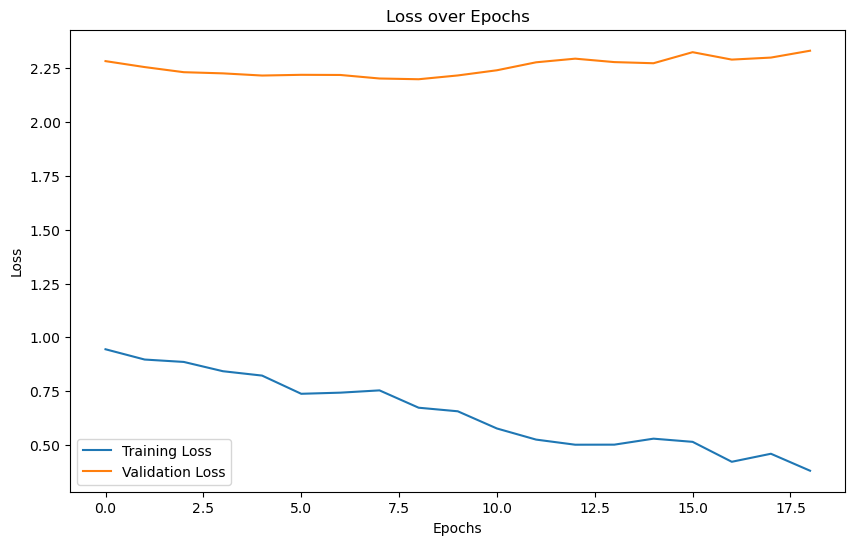

In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add callbacks for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Plot the training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)


2025-01-19 16:29:40.855703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-19 16:29:40.856561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-19 16:29:40.857198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 1s 2ms/step
Test MSE: 0.015193521525745388
Test MAE: 0.09417244825181569
Test MAPE: 487.0715064252353%


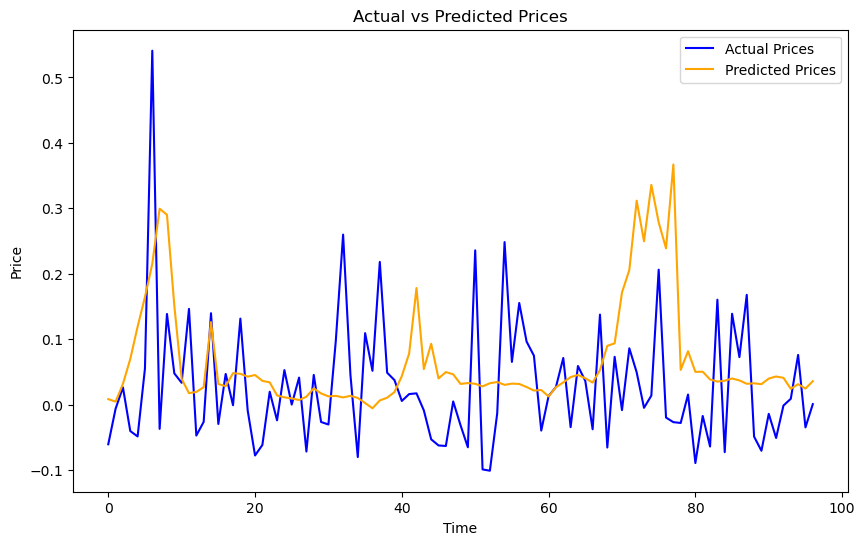

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Rescale predictions and actual values back to the original scale
y_pred_rescaled = scaler.inverse_transform([[0] * (X_test.shape[2] - 1) + [y] for y in y_pred.ravel()])[:, -1]
y_test_rescaled = scaler.inverse_transform([[0] * (X_test.shape[2] - 1) + [y] for y in y_test])[:, -1]

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test_rescaled - y_pred_rescaled) ** 2)
print(f'Test MSE: {mse}')

# Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
mae = np.mean(np.abs(y_test_rescaled - y_pred_rescaled))
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape}%')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Save the trained model
model.save('lstm_multivariate_model.h5')
print("Model saved as 'lstm_multivariate_model.h5'.")

from tensorflow.keras.models import load_model
reloaded_model = load_model('lstm_multivariate_model.h5')
print("Model reloaded successfully.")


Model saved as 'lstm_multivariate_model.h5'.
Model reloaded successfully.


2025-01-17 22:43:41.683549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-17 22:43:41.683983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-17 22:43:41.684525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus